**Name: Arpit Sanjay Avasarmol**


**Project: Interacting with PDFs using LLama2 7B fine-tuned model and LLamaIndex, and HuggingFace Embeddings**

###**GamePlan/WorkFlow:**

- We have an Annual Report 2021-22 for the Company "Tata Motors".

- I want to Index this PDF documents but instead of using OpenAI 's embeddings,I'll use the Sentence Transformers to get the embeddings.

- So due to this the PDF document is broken into chunks, each of these chunks is converted into embeddings, basically the text is converted into embeddings using sentence Transformers. These embeddings are loaded into a vector index.

- And when I send a query, then the query will find the context for me, and the context is retrieved and it is given to LLama2 7B fine-tuned model to get me the response back.

- So, here LLama index comes into the picture, so this internally makes the use of the Sentence Transformer Embeddings and LLama 7B model.

- By Default, LLama index makes use of the OpenAI Embeddings and openAI chatGPT3.5 to get the response, and here I have customised it little(I have used HuggingFace LLMs).

###**Installing the Dependencies**

In [ ]:
!pip install pypdf
!pip install python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.3/270.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.3 MB/s eta 0:00:00


###**Installing Sentence Transformer**
Installing Sentence Transformer because I'm not using OpenAI for Embeddings, rather I'll use the custom embeddings

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=66b94aeeb8a0a49f4ff5f14b23d1adc4c75baf62af9ca866c87fdb8a1093da87
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
!pip install llama-index


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.1/645.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 8.0 MB/s eta 0:00:00


###**Custome Embeddings**
Instead of using OpenAI 's Embeddings, I have used HuggingFace LLMs.

In [ ]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

from llama_index import VectorStoreIndex, SimpleDirectoryReader, ServiceContext

from llama_index.llms import HuggingFaceLLM

###**Load the Data**
Read the document, which is under the "Data" Folder in the files, for that I have used the SimpleDirectory reader from the LLama Index to load this PDF

In [ ]:
documents = SimpleDirectoryReader("/content/Data/").load_data()

####**Creating the Prompts**
Now, creating a simple system Prompt and a simple input Prompt where we have a user query string Assistant.

In [ ]:

from llama_index.prompts.prompts import SimpleInputPrompt


system_prompt = "You are a Q&A assistant. Your goal is to answer questions as accurately as possible based on the instructions and context provided."



# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = SimpleInputPrompt("<|USER|>{query_str}<|ASSISTANT|>")

###**Download the HuggingFace Transformer**
Login into my HuggingFace using the access token to make use of LLama 7B model(download).

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cre

## **Creating an LLM Instance**
Creating the LLM instance which is LLama2 7B model(fine-tuned model).

NOTE: The "hf"(hugging Face) in the model says it is fine-tuned and not the raw model.

###**Using GPU Effectively**
By Default,if I load the model , it will nearly take 7B * 2 = 14B ie., the model will take more than 14GB of VRAM(then I wont be able to run any query), so What I'll do is I will load in 8-bit over here and my Precision is also torch float 16, because of this if I run this code block and load this model it will take somewhere around 7GB(exact 7.7 GB of memory) of memory.

In this way I'm instantiating the LLM over here using the system Prompt

So, now I have successfully loaded the model.


In [ ]:
import torch

llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.0, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="meta-llama/Llama-2-7b-chat-hf",
    model_name="meta-llama/Llama-2-7b-chat-hf",
    device_map="auto",
    # uncomment this if using CUDA to reduce memory usage
    model_kwargs={"torch_dtype": torch.float16 , "load_in_8bit":True}
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

# **Instantiate the Embeddings**
So once the LLM is instantiated, and now I actually want to instantiate the embedding models.

From LangChain Embeddings, hugging Face Embeddings I have to import the huggingFace embeddings;

From LLama index import the LangChain Embeddings and ServiceContext.

So here I'm doing Embed the model Embedding, instantiating the sentence transformer, so now the Sentence transformer model is also downloaded.

In [ ]:
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
from llama_index import LangchainEmbedding, ServiceContext

embed_model = LangchainEmbedding(
  HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
)


#Creating the Service Context
By Default the LLama Index will make use of OpenAI, so that's why we have to instantiate a serviceContext specifying the chunk size, model and embedding model. So now we can ask the model to use the LLama2 7B model and use the sentence embeddings.

In [ ]:
service_context = ServiceContext.from_defaults(
    chunk_size=1024,
    llm=llm,
    embed_model=embed_model
)

Index the document using vectorStoreIndex from documents by passing the documents and the serviceContext.

So, now this reads the PDF, it takes the PDF into chunks and the chunks are then passed to sentence transformers to get the Embeddings. And, this Embeddings or vectors are then indexed.

In [ ]:
index = VectorStoreIndex.from_documents(documents, service_context=service_context)

#Creating a Query Engine to interact with the PDF

Now whenever the query is send, it actually finds from this vectorIndex which is the closet context or closet text chunk. Then that chunk is send along with this prompt to LLama2 and will get the response back from it. This is also known as **Context Augmented Retrieval** Using LLMs

In [ ]:
query_engine = index.as_query_engine()
response = query_engine.query("What new vehicles did Tata launch in 2022?")

In [ ]:
print(response)

Tata Motors launched the advanced iCNG technology for their brands - Tiago and Tigor in 2022. The new Tiago iCNG and Tigor iCNG are powered by the Revotron 1.2L BS VI engine which produces maximum power of 73PS - the highest for any CNG car in this segment.


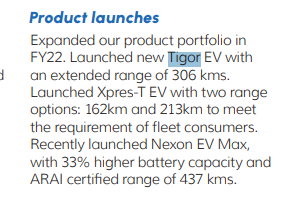

In [13]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('tigor.png')

cv2_imshow( image)

cv2.waitKey(0)

cv2.destroyAllWindows()

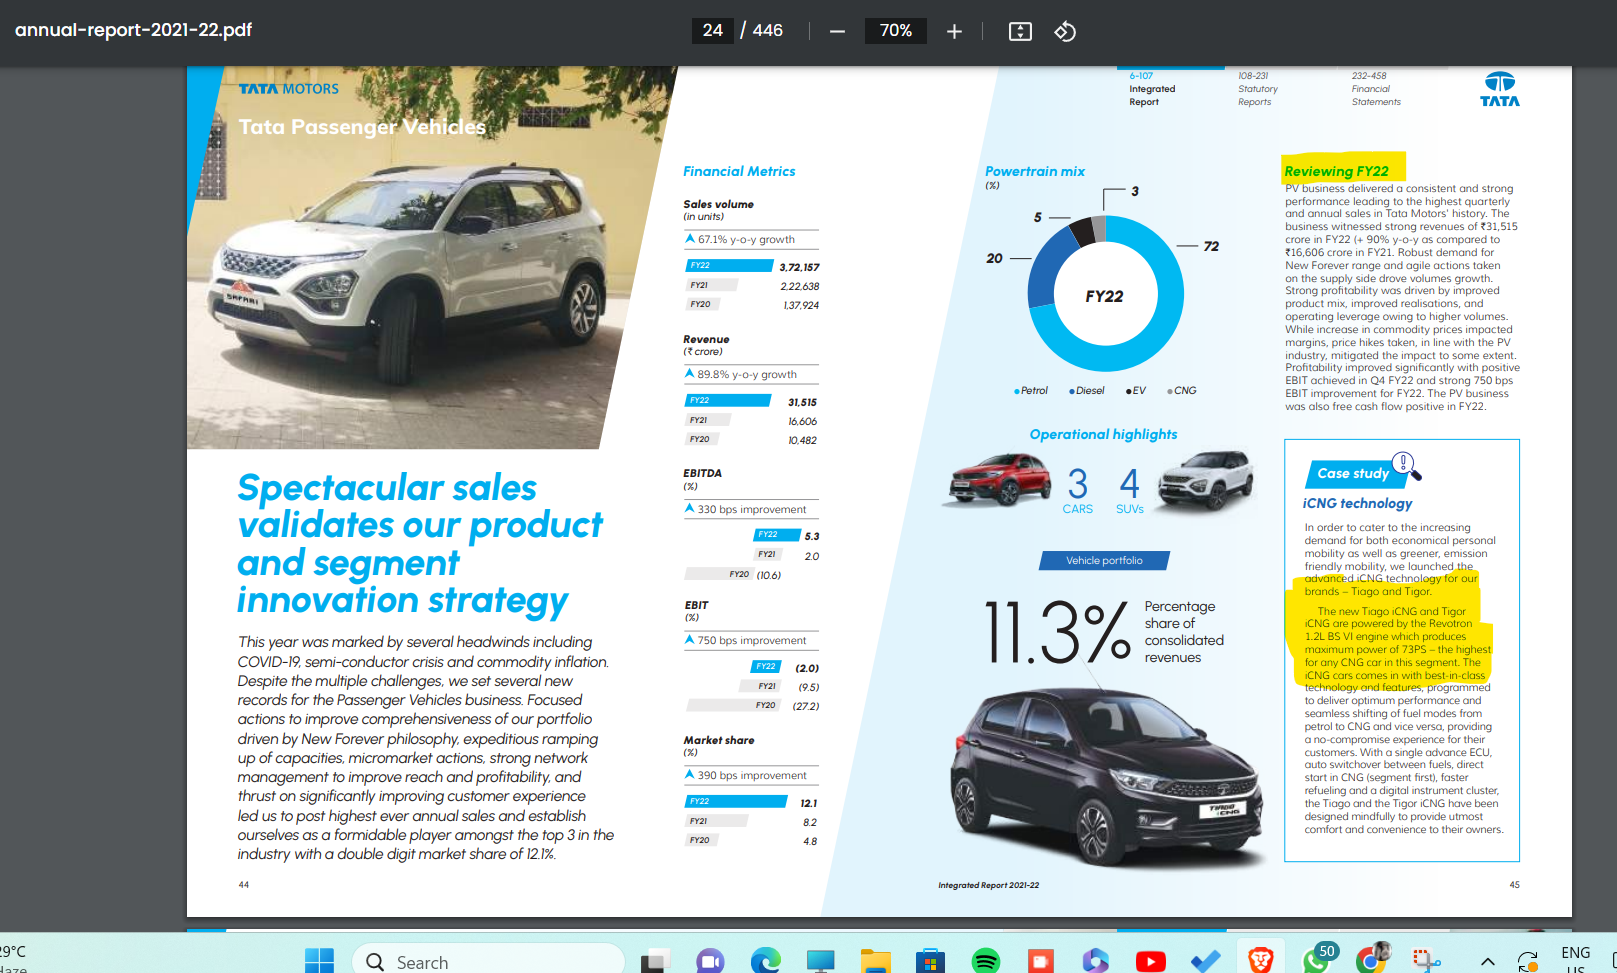

In [14]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('output Proof.png')

cv2_imshow( image)

cv2.waitKey(0)

cv2.destroyAllWindows()

Proof:
From this page, the LLama model has retrived the information. And, this is the output the LLama gives depending on the information(Annual Report 2021-22) we provided.

# **Output Responses**
Now,ask the Queries in the Loop, make sure you dont Fully use the resources

In [ ]:
while True:
  query=input()
  response = query_engine.query(query)
  print(response)

Totally irrelevant question
What is the average age of employees at Jaguar Land Rover?
What is the cost of an iphone
The cost of an iPhone varies depending on the model and storage capacity. According to the annual report of Tata Motors for the financial year 2021-22, the cost of an iPhone is not disclosed. The report only provides information on the company's expenses, including freight, transportation, port charges, and other expenses, but does not provide information on the cost of individual products like iPhones. Therefore, I cannot provide an answer to your question.


NOTE: The Accuracy depends on the Embeddings and how the retrieval happens over here.

NOTE: The OpenAI's Embeddings gives better results compared to the Sentence Transformers.